In [ ]:
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
data = pd.read_csv('/web_traffic.tsv',delimiter='\t',names=["hour", "requests"])

import numpy as np
from numpy import isnan

target_var_name = 'requests'

# Считываем данные без NaN с помощью dropna()
hours_data = data.dropna()['hour']

# Считываем данные без NaN с помощью dropna()
requests_data = data.dropna()[target_var_name]

#hours_data = hours_data[~isnan(requests_data)]
#requests_data = requests_data[~isnan(requests_data)]
#hours_data = hours_data[requests_data.dropna()]

# Считываем данные без NaN с помощью dropna()
#requests_data = requests_data.dropna()

print(hours_data)
print(requests_data)

requests_data.head()

0        1
2        3
3        4
4        5
5        6
      ... 
738    739
739    740
740    741
741    742
742    743
Name: hour, Length: 735, dtype: int64
0      2272.0
2      1386.0
3      1365.0
4      1488.0
5      1337.0
        ...  
738    4970.0
739    4813.0
740    5392.0
741    5906.0
742    4881.0
Name: requests, Length: 735, dtype: float64


0    2272.0
2    1386.0
3    1365.0
4    1488.0
5    1337.0
Name: requests, dtype: float64

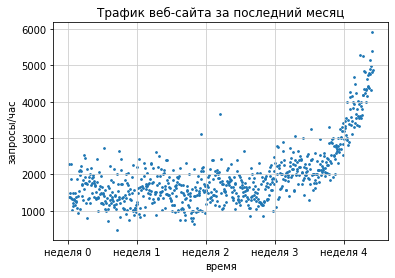

In [ ]:
plt.scatter(hours_data, requests_data, s=3)
plt.title('Трафик веб-сайта за последний месяц')

plt.xlabel('время')
plt.ylabel('запросы/час')

plt.xticks([w*7*24 for w in range(10)],["неделя %i" %w for w in range(10)])
plt.autoscale(tight=False)

plt.grid(True, linestyle='-', color='0.8')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

# MSE с помощью mean_squared_error из sklearn
def error(f,x,y):
    return mean_squared_error(y, f(x))

#def error(f,x,y):
#    return np.sum((f(x)-y)**2)

# Рефакторинг этой функции: найти в документации каким образом 
# вычисляется mse с помощью функции из scipy

In [ ]:
# два предположения по поводу тренда: 

# 1 - предполагаем один тренд линейный или квадратичный тренд
# 2 - не один тренд, а два - линейных или один линейный, а второй - квадратичный
# где-то по границе 3.5 недели

# вычисляем параметры модели #1 
f1p, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 1, full=True)
print(f"Параметры модели 1:\n{f1p}\n")

# вычисляем параметры модели #2
f2p, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 2, full=True)
print(f"Параметры модели 2:\n{f2p}\n")

# вычисляем параметры модели #3
f3p, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 3, full=True)
print(f"Параметры модели 3:\n{f3p}\n")

# вычисляем параметры модели #4
f4p, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 5, full=True)
print(f"Параметры модели 4:\n{f4p}\n")

# вычисляем параметры модели #5
f5p, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 10, full=True)
print(f"Параметры модели 5:\n{f5p}\n")

# вычисляем параметры модели #6
f6p, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 20, full=True)
print(f"Параметры модели 6:\n{f6p}\n")

Параметры модели 1:
[  2.59619213 989.02487106]

Параметры модели 2:
[ 1.05322215e-02 -5.26545650e+00  1.97476082e+03]

Параметры модели 3:
[ 3.04960132e-05 -2.35893797e-02  4.94226019e+00  1.33328797e+03]

Параметры модели 4:
[ 2.16470951e-10 -3.13405153e-07  1.63844797e-04 -3.41497485e-02
  2.24785575e+00  1.53616050e+03]

Параметры модели 5:
[-3.73981968e-22  1.36473756e-18 -2.14294406e-15  1.89884971e-12
 -1.04570108e-09  3.70867731e-07 -8.45604588e-05  1.19167041e-02
 -9.41618606e-01  3.33703840e+01  1.26421204e+03]

Параметры модели 6:
[ 4.83090666e-47 -3.18254288e-43  8.87216773e-40 -1.31484635e-36
  9.87793047e-34 -8.55503070e-32 -5.09644269e-28  3.80311873e-25
  4.98732305e-23 -2.74831025e-19  2.35473549e-16 -1.17298303e-13
  3.93132320e-11 -9.23453278e-09  1.52942330e-06 -1.76098283e-04
  1.36396780e-02 -6.69561733e-01  1.86541701e+01 -2.35174285e+02
  2.33820200e+03]



In [ ]:
# вычисляем ошибку модели #1 
f1 = np.poly1d(f1p)
print(f"{error(f1, hours_data, requests_data):.5}")

# вычисляем ошибку модели #2 
f2 = np.poly1d(f2p)
print(f"{error(f2, hours_data, requests_data):.5}")

# вычисляем ошибку модели #3 
f3 = np.poly1d(f3p)
print(f"{error(f3, hours_data, requests_data):.5}")

# вычисляем ошибку модели #4 
f4 = np.poly1d(f4p)
print(f"{error(f4, hours_data, requests_data):.5}")

# вычисляем ошибку модели #5 
f5 = np.poly1d(f5p)
print(f"{error(f5, hours_data, requests_data):.5}")

# вычисляем ошибку модели #6
f6 = np.poly1d(f6p)
print(f"{error(f6, hours_data, requests_data):.5}")

3.1739e+08
1.7998e+08
1.3935e+08
1.2446e+08
1.2194e+08
1.1053e+08


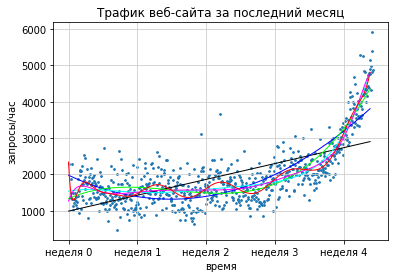

In [ ]:
plt.title('Трафик веб-сайта за последний месяц')
plt.xlabel('время')
plt.ylabel('запросы/час')
plt.xticks([w*7*24 for w in range(10)],["неделя %i" %w for w in range(10)])
plt.autoscale(tight=False)
plt.grid(True, linestyle='-', color='0.8')

# визуализация данных
plt.scatter(hours_data, requests_data, s=3)

# отобразим модель #1 
f1x = np.linspace(0, hours_data[len(hours_data)], len(hours_data))
f1y = f1(f1x)
plt.plot(f1x, f1y, linewidth=1.0, color='black')

# отобразим модель #2
f2x = np.linspace(0, hours_data[len(hours_data)], len(hours_data))
f2y = f2(f2x)
plt.plot(f2x, f2y, linewidth=1.0, color='blue')

# отобразим модель #3
f3x = np.linspace(0, hours_data[len(hours_data)], len(hours_data))
f3y = f3(f3x)
plt.plot(f3x, f3y, linewidth=1.0, color='lime')

# отобразим модель #4
f4x = np.linspace(0, hours_data[len(hours_data)], len(hours_data))
f4y = f4(f4x)
plt.plot(f4x, f4y, linewidth=1.0, color='cyan')

# отобразим модель #5
f5x = np.linspace(0, hours_data[len(hours_data)], len(hours_data))
f5y = f5(f5x)
plt.plot(f5x, f5y, linewidth=1.0, color='magenta')

# отобразим модель #6
f6x = np.linspace(0, hours_data[len(hours_data)], len(hours_data))
f6y = f6(f6x)
plt.plot(f6x, f6y, linewidth=1.0, color='red')

plt.show()

In [ ]:
divider = int(3.5*7*24)
divider2 = int(4.1*7*24)
print(divider, divider2)
# print(hours_data.shape)
hours_data_1, requests_data_1 = hours_data[:divider], requests_data[:divider]
hours_data_2, requests_data_2 = hours_data[divider:divider2], requests_data[divider:divider2]

hours_data_test, requests_data_test = hours_data[divider2:], requests_data[divider2:]

print(requests_data_1.shape, requests_data_2.shape, requests_data_test.shape)

588 688
(588,) (100,) (47,)


In [ ]:
f3p, residuals, rank, sv, rcond = np.polyfit(hours_data_1, requests_data_1, 3, full=True)
f3 = np.poly1d(f3p)
print(f"MSE (для данных ДО 3.5 недели)= {error(f3, hours_data_1, requests_data_1):.5}")
print(f"MSE (только для данных с 3.5 недели)= {error(f3, hours_data_2, requests_data_2):.5}")

MSE (для данных ДО 3.5 недели)= 1.0159e+08
MSE (только для данных с 3.5 недели)= 2.3315e+07


In [ ]:
f20p, residuals, rank, sv, rcond = np.polyfit(hours_data_2, requests_data_2, 20, full=True)
f20 = np.poly1d(f20p)
print(f"MSE (для данных c 3.5 недели по 4.1 недели)= {error(f20, hours_data_2, requests_data_2):.5}")
print(f"MSE (только для данных с 3.5 недели)= {error(f20, hours_data_test, requests_data_test):.5}")

MSE (для данных c 3.5 недели по 4.1 недели)= 9.9735e+06
MSE (только для данных с 3.5 недели)= 1.0232e+15


# Ответить на вопрос

Какая модель для гипотезы, при которой весь набор данных представляет собой два диапазона значений (от 0 недели до 3.5 недели и с 3.5 недели до конца), подходит наилучшим образом?
Модель, в данном случае, это степень полинома. 
Мы уже знаем (см. ячейку выше), что степень полинома 20 плохо подходит для тестовых данных (hours_data_test и requests_data_test) потому что ошибка для тестовых данных на 9 порядков выше, чем ошибка для тренировочного набора данных.

In [ ]:

print("Полином степени 1")
print(f"MSE (для данных c 3.5 недели по 4.1 недели)= {error(f1, hours_data_1, requests_data_1):.5}")
print(f"MSE (только для данных с 3.5 недели)= {error(f1, hours_data_2, requests_data_2):.5}\n")

print("Полином степени 2")
print(f"MSE (для данных c 3.5 недели по 4.1 недели)= {error(f2, hours_data_1, requests_data_1):.5}")
print(f"MSE (только для данных с 3.5 недели)= {error(f2, hours_data_2, requests_data_2):.5}\n")

print("Полином степени 3")
print(f"MSE (для данных c 3.5 недели по 4.1 недели)= {error(f3, hours_data_1, requests_data_1):.5}")
print(f"MSE (только для данных с 3.5 недели)= {error(f3, hours_data_2, requests_data_2):.5}\n")

print("Полином степени 4")
print(f"MSE (для данных c 3.5 недели по 4.1 недели)= {error(f4, hours_data_1, requests_data_1):.5}\n")
print(f"MSE (только для данных с 3.5 недели)= {error(f4, hours_data_2, requests_data_2):.5}\n")

print("Полином степени 5")
print(f"MSE (для данных c 3.5 недели по 4.1 недели)= {error(f5, hours_data_1, requests_data_1):.5}")
print(f"MSE (только для данных с 3.5 недели)= {error(f5, hours_data_2, requests_data_2):.5}\n")

print("Полином степени 6")
print(f"MSE (для данных c 3.5 недели по 4.1 недели)= {error(f6, hours_data_1, requests_data_1):.5}")
print(f"MSE (только для данных с 3.5 недели)= {error(f6, hours_data_2, requests_data_2):.5}")

Полином степени 1
MSE (для данных c 3.5 недели по 4.1 недели)= 1.7234e+08
MSE (только для данных с 3.5 недели)= 3.4456e+07

Полином степени 2
MSE (для данных c 3.5 недели по 4.1 недели)= 1.1887e+08
MSE (только для данных с 3.5 недели)= 2.9709e+07

Полином степени 3
MSE (для данных c 3.5 недели по 4.1 недели)= 1.0159e+08
MSE (только для данных с 3.5 недели)= 2.3315e+07

Полином степени 4
MSE (для данных c 3.5 недели по 4.1 недели)= 1.0311e+08

MSE (только для данных с 3.5 недели)= 1.335e+07

Полином степени 5
MSE (для данных c 3.5 недели по 4.1 недели)= 1.0033e+08
MSE (только для данных с 3.5 недели)= 1.2925e+07

Полином степени 6
MSE (для данных c 3.5 недели по 4.1 недели)= 9.1187e+07
MSE (только для данных с 3.5 недели)= 1.1382e+07
